In [2]:
# A simple neural network to detect handwritten digits using the Alexnet architecture.
# The tensorflow library will be used to create the network.

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

x_train shape : (45000, 28, 28)
y_train shape : (45000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)



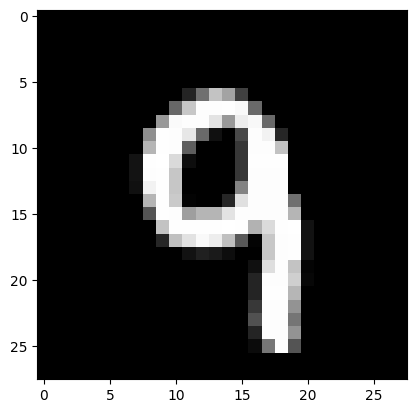

y_train : 9


In [4]:
# Load the data using keras.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

print("x_train shape : {}\ny_train shape : {}\nx_test shape : {}\ny_test shape : {}\n"
      .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

plt.imshow(x_train[0], cmap='gray')
plt.show()

print("y_train : {}".format(y_train[0]))

In [5]:
target_size = (224, 224)
x_train = x_train[:5000]
y_train = y_train[:5000]

x_train = tf.image.resize(x_train[..., tf.newaxis], (target_size[0], target_size[1]))
x_train = tf.image.grayscale_to_rgb(x_train)

x_val = x_val[:1000]
x_val = tf.image.resize(x_val[..., tf.newaxis], (target_size[0], target_size[1]))
x_val = tf.image.grayscale_to_rgb(x_val)

x_test = x_test[:1000]
x_test = tf.image.resize(x_test[..., tf.newaxis], (target_size[0], target_size[1]))
x_test = tf.image.grayscale_to_rgb(x_test)


In [13]:
y_val = y_val[:1000]
y_test = y_test[:1000]

x_train shape : (5000, 224, 224, 3)
y_train shape : (5000,)
x_test shape : (1000, 224, 224, 3)
y_test shape : (10000,)



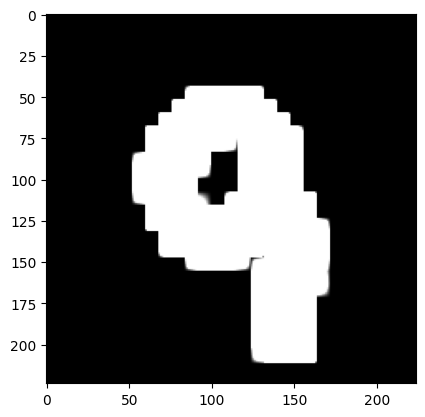

In [6]:
print("x_train shape : {}\ny_train shape : {}\nx_test shape : {}\ny_test shape : {}\n"
      .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

plt.imshow(x_train[0], cmap='gray')
plt.show()

In [7]:
tf.keras.layers.MaxPooling2D?

In [10]:
# Create the network using keras.
# Alexnet architecture : consist of 8 layers.
# Layer 1 > 96 filters of 11 x 11 with stride 4 Convolution
# Layer 2 > Maxpooling layer 3 x 3 with stride 2
# Layer 3 > 256 filters of 5x5 with padding as 2 Convolution
# Layer 4 > Maxpooling layer 3 x 3 with stride 2
# Layer 5 > 3 x 3 convolution of 384 filters, padding 1
# Layer 6 > same as above
# Layer 7 > Same as above, but with 256 filters
# Layer 8 > Maxpooling layer 3 x 3 with stride 2
# Layer 9 > FC 4096
# Layer 10 > FC 4096
# Layer 11 > Output (Fc 1000)

alexnet_model = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(224,224,3)),
     tf.keras.layers.Conv2D(96, 11, 4,  activation='relu'),
     tf.keras.layers.MaxPooling2D(3, 2),
     tf.keras.layers.Conv2D(256, 5, 1, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(3, 2),
     tf.keras.layers.Conv2D(384, 3, 1, padding='same',  activation='relu'),
     tf.keras.layers.Conv2D(384, 3, 1, padding='same', activation='relu'),
     tf.keras.layers.Conv2D(256, 3, 1, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(3, 2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(4096, activation='relu'),
     tf.keras.layers.Dense(4096, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
])

alexnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 384)       885120    
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 384)      

In [11]:
alexnet_model.fit?

In [14]:

# Compile the network.
alexnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
alexnet_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
157/157 [==============================] - 11s 49ms/step - loss: 0.3911 - accuracy: 0.8850 - val_loss: 0.4374 - val_accuracy: 0.8690
Epoch 2/10
157/157 [==============================] - 7s 46ms/step - loss: 0.2136 - accuracy: 0.9380 - val_loss: 0.3793 - val_accuracy: 0.8780
Epoch 3/10
157/157 [==============================] - 8s 49ms/step - loss: 0.1970 - accuracy: 0.9410 - val_loss: 0.2013 - val_accuracy: 0.9450
Epoch 4/10
157/157 [==============================] - 7s 45ms/step - loss: 0.2170 - accuracy: 0.9406 - val_loss: 0.2690 - val_accuracy: 0.9240
Epoch 5/10
157/157 [==============================] - 7s 45ms/step - loss: 0.1161 - accuracy: 0.9648 - val_loss: 0.1647 - val_accuracy: 0.9580
Epoch 6/10
157/157 [==============================] - 7s 44ms/step - loss: 0.1291 - accuracy: 0.9690 - val_loss: 0.2658 - val_accuracy: 0.9360
Epoch 7/10
157/157 [==============================] - 7s 46ms/step - loss: 0.1620 - accuracy: 0.9576 - val_loss: 0.2379 - val_accuracy: 0.934

In [15]:
# Evaluation performance of network.
test_loss, test_acc = alexnet_model.evaluate(x_test, y_test)
print('Accuracy : {}'.format(test_acc * 100.0))
print('Loss : {}'.format(test_loss))


32/32 [==============================] - 1s 21ms/step - loss: 0.2885 - accuracy: 0.9400
Accuracy : 93.99999976158142
Loss : 0.288472443819046
